In [1]:
#Data Set (Bike Details)

import pandas as pd

# Load the dataset
file_path = "/Users/sangameshwaruppe/custom_app/BIKE DETAILS.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


(None,
                                   name  selling_price  year seller_type  \
 0            Royal Enfield Classic 350         175000  2019  Individual   
 1                            Honda Dio          45000  2017  Individual   
 2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
 3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
 4                Yamaha SZ [2013-2014]          20000  2011  Individual   
 
        owner  km_driven  ex_showroom_price  
 0  1st owner        350                NaN  
 1  1st owner       5650                NaN  
 2  1st owner      12000           148114.0  
 3  1st owner      23000            89643.0  
 4  2nd owner      21000                NaN  )

In [2]:
import pandas as pd

# Calculate the range of selling prices
selling_price_range = df["selling_price"].max() - df["selling_price"].min()

print(f"Range of selling prices: {selling_price_range}")

Range of selling prices: 755000


In [3]:
median_price = df["selling_price"].median()
print("Median Selling Price:", median_price)

Median Selling Price: 45000.0


In [4]:
# Most Common Seller Type
df['seller_type'].value_counts().idxmax()


'Individual'

In [5]:
# Number of Bikes Driven More than 50,000 km
df[df['km_driven'] > 50000].shape[0]


170

In [6]:
# Average km_driven for Each Ownership Type
df.groupby('owner')['km_driven'].mean()


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [7]:
# proportion of Bikes from 2015 or Older

(df[df['year'] <= 2015].shape[0]) / df.shape[0]


0.5664467483506126

<Axes: title={'center': 'Missing Values per Column'}>

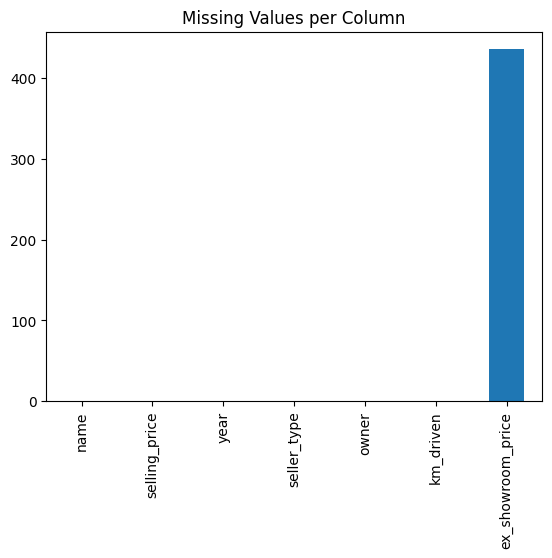

In [8]:
#  Trend of Missing Values Across the Dataset

df.isnull().sum().plot(kind='bar', title='Missing Values per Column')


In [9]:
# Highest ex_showroom_price and Corresponding Bike

max_price = df['ex_showroom_price'].max()
df[df['ex_showroom_price'] == max_price][['name', 'ex_showroom_price']]


,name,ex_showroom_price
134,Harley-Davidson Street Bob,1278000.0


In [10]:
# Total Number of Bikes Listed by Each Seller Type

df['seller_type'].value_counts()


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

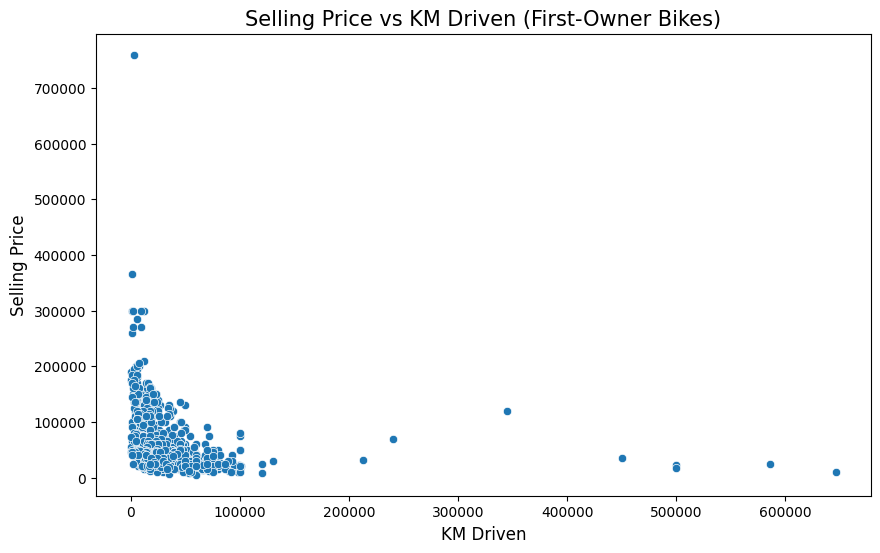

In [11]:
#Relationship Between selling_price and km_driven for First-Owner Bikes
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for '1st owner' bikes
first_owner_bikes = df[df['owner'] == '1st owner']

# Plot the relationship between selling_price and km_driven for first-owner bikes
plt.figure(figsize=(10,6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')

# Adding titles and labels
plt.title("Selling Price vs KM Driven (First-Owner Bikes)", fontsize=15)
plt.xlabel("KM Driven", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)

# Show the plot
plt.show()


In [12]:
# Identifying and Removing Outliers in km_driven using IQR Method

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

df_cleaned


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


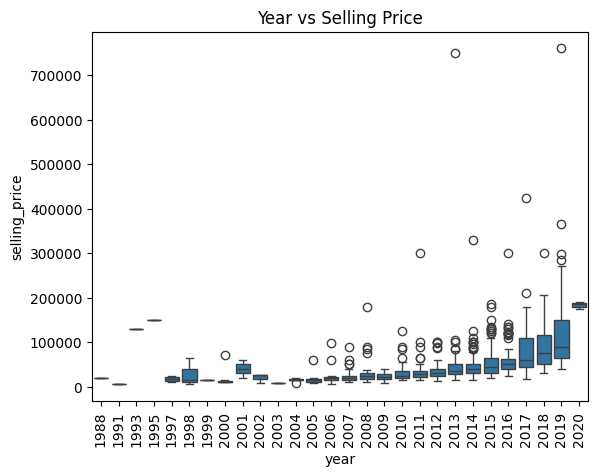

In [13]:
# Bivariate Analysis: Relationship Between year and selling_price

sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=90)
plt.title("Year vs Selling Price")
plt.show()


<Axes: title={'center': 'Average Depreciation in Selling Price'}, xlabel='bike_age'>

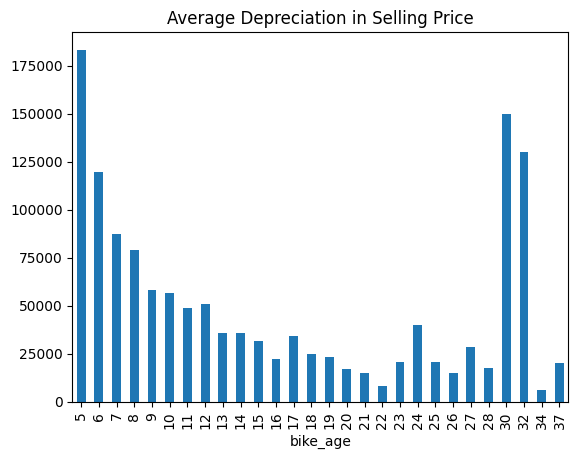

In [14]:
# Average Depreciation in Selling Price Based on Bike’s Age

current_year = 2025  # Adjust based on current year
df['bike_age'] = current_year - df['year']
df.groupby('bike_age')['selling_price'].mean().plot(kind='bar', title="Average Depreciation in Selling Price")



In [15]:
#Bikes Priced Significantly Above the Average for Their Manufacturing Year

year_avg_price = df.groupby('year')['selling_price'].mean()
df['above_avg'] = df.apply(lambda row: row['selling_price'] > (year_avg_price[row['year']] * 1.5), axis=1)
df[df['above_avg']][['name', 'selling_price', 'year']]


,name,selling_price,year
2,Royal Enfield Classic Gunmetal Grey,150000,2018
7,Royal Enfield Bullet 350 [2007-2011],180000,2008
13,Yamaha YZF R3,365000,2019
18,Royal Enfield Classic Gunmetal Grey,150000,2018
23,Jawa Standard,180000,2019
...,...,...,...
979,Royal Enfield Thunder 500,105000,2015
981,Royal Enfield Thunder 350,105000,2013
983,Royal Enfield Classic 350,100000,2015
984,Royal Enfield Classic 500,95000,2014


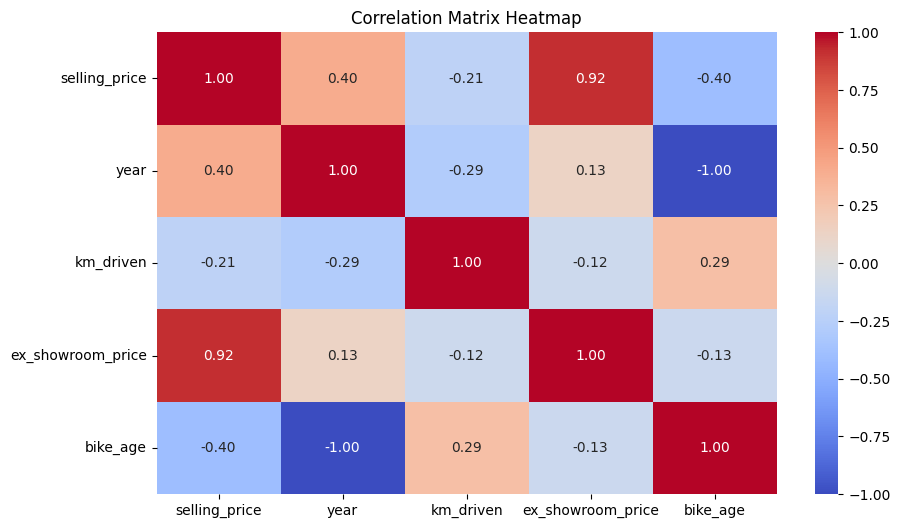

In [16]:
#Correlation Matrix & Heatmap for Numeric Columns

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [17]:
################################################
 #Car Sales - Data set
################################################

In [18]:
import pandas as pd

# Load the dataset
file_path = "/Users/sangameshwaruppe/custom_app/Car Sale.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


(None,
          Car_id      Date Customer Name Gender  Annual Income  \
 0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
 1  C_CND_000002  1/2/2022           Gia   Male        1480000   
 2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
 3  C_CND_000004  1/2/2022       Giselle   Male          13500   
 4  C_CND_000005  1/2/2022         Grace   Male        1465000   
 
                            Dealer_Name   Company       Model  \
 0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
 1                     C & M Motors Inc     Dodge     Durango   
 2                          Capitol KIA  Cadillac    Eldorado   
 3               Chrysler of Tri-Cities    Toyota      Celica   
 4                    Chrysler Plymouth     Acura          TL   
 
                       Engine Transmission       Color  Price ($)  Dealer_No   \
 0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
 1  DoubleÂ Overhead Camshaft         Aut

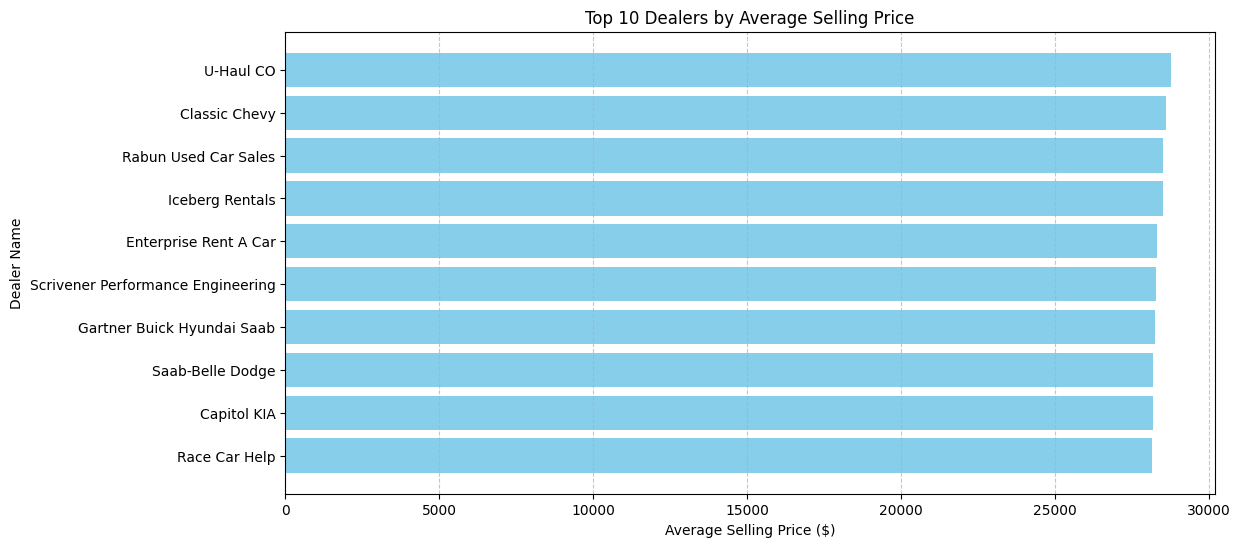

In [19]:
# What is the average selling price of cars for each dealer, and how does it compare across different dealers

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Car Sale.csv")

# Group by Dealer and calculate average price
avg_price_per_dealer = df.groupby("Dealer_Name")["Price ($)"].mean().reset_index()

# Sort dealers by average price (descending)
avg_price_per_dealer = avg_price_per_dealer.sort_values(by="Price ($)", ascending=False)

# Select top 10 dealers for visualization
top_dealers = avg_price_per_dealer.head(10)

# Plot the data
plt.figure(figsize=(12, 6))
plt.barh(top_dealers["Dealer_Name"], top_dealers["Price ($)"], color="skyblue")
plt.xlabel("Average Selling Price ($)")
plt.ylabel("Dealer Name")
plt.title("Top 10 Dealers by Average Selling Price")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()



In [20]:
#Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trendsE

# Retry calculating price variation (standard deviation) for each car brand
price_variation = df.groupby("Company")["Price ($)"].std().reset_index()

# Rename columns for clarity
price_variation.columns = ["Company", "Price Variation (Std Dev)"]

# Sort by highest variation
price_variation = price_variation.sort_values(by="Price Variation (Std Dev)", ascending=False)

# Display the top 10 companies with the highest price variation
price_variation.head(10)


,Company,Price Variation (Std Dev)
15,Lincoln,19658.050211
24,Saab,19653.740089
4,Cadillac,19517.120220
21,Plymouth,19065.997338
14,Lexus,17852.923492
3,Buick,17142.232626
17,Mercury,16445.172195
19,Nissan,16214.264017
25,Saturn,15990.223671
8,Ford,15849.090227


/var/folders/jh/g_r1fv6517736v3zrlpkmgzw0000gn/T/ipykernel_4025/1527203585.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Transmission", y="Price ($)", data=df, palette="coolwarm")


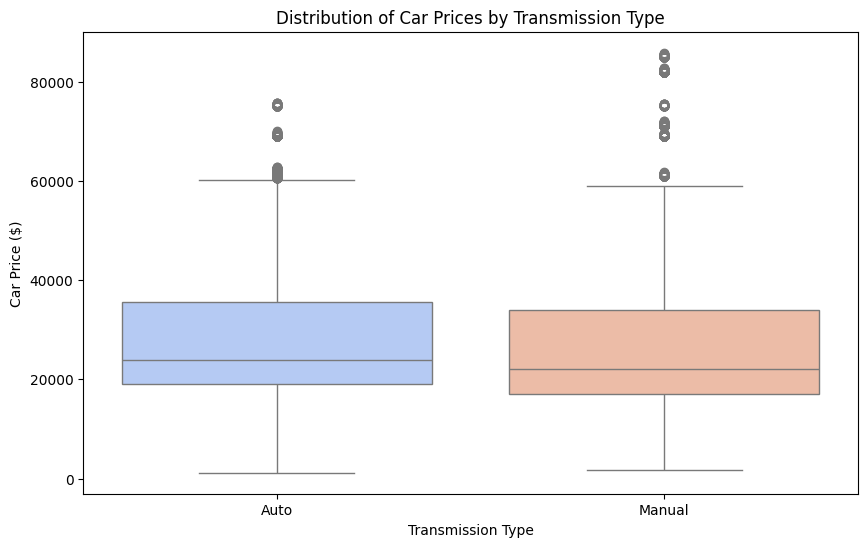

In [21]:
# What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to show the distribution of car prices by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x="Transmission", y="Price ($)", data=df, palette="coolwarm")

# Set labels and title
plt.xlabel("Transmission Type")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Car Prices by Transmission Type")

# Show the plot
plt.show()

/var/folders/jh/g_r1fv6517736v3zrlpkmgzw0000gn/T/ipykernel_4025/561509451.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dealer_Region", y="Price ($)", data=df, palette="viridis")


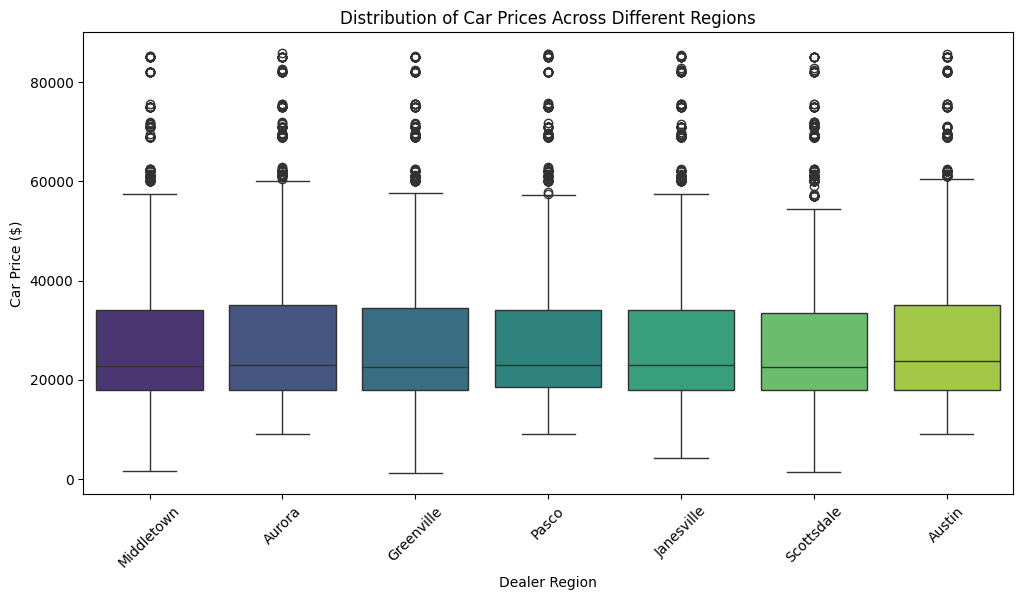

In [22]:
#What is the distribution of car prices across different regions

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to show the distribution of car prices by region
plt.figure(figsize=(12, 6))
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel("Dealer Region")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Car Prices Across Different Regions")

# Show the plot
plt.show()


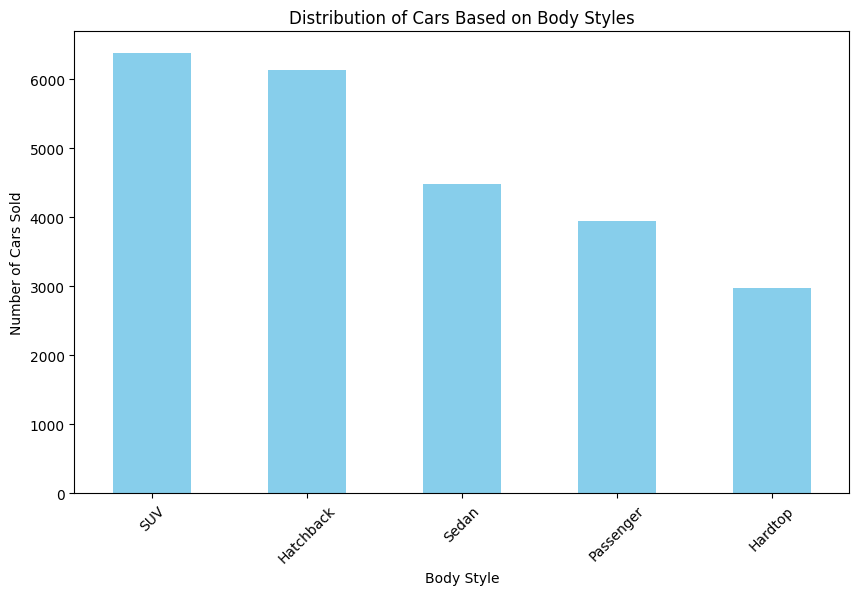

In [23]:
#What is the distribution of cars based on body styles

import pandas as pd
import matplotlib.pyplot as plt

# Count the number of cars per body style
body_style_counts = df["Body Style"].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
body_style_counts.plot(kind="bar", color="skyblue")

# Set labels and title
plt.xlabel("Body Style")
plt.ylabel("Number of Cars Sold")
plt.title("Distribution of Cars Based on Body Styles")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


/var/folders/jh/g_r1fv6517736v3zrlpkmgzw0000gn/T/ipykernel_4025/3726636548.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=car_counts.index, y=car_counts.values, palette="coolwarm")


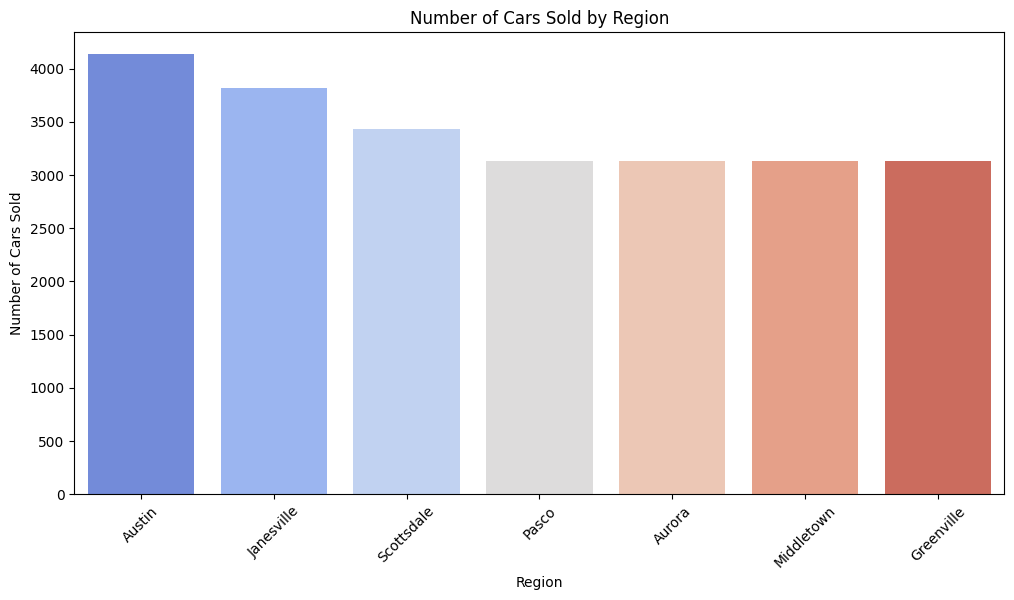

/var/folders/jh/g_r1fv6517736v3zrlpkmgzw0000gn/T/ipykernel_4025/3726636548.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dealer_Region", y="Price ($)", data=df, palette="viridis")


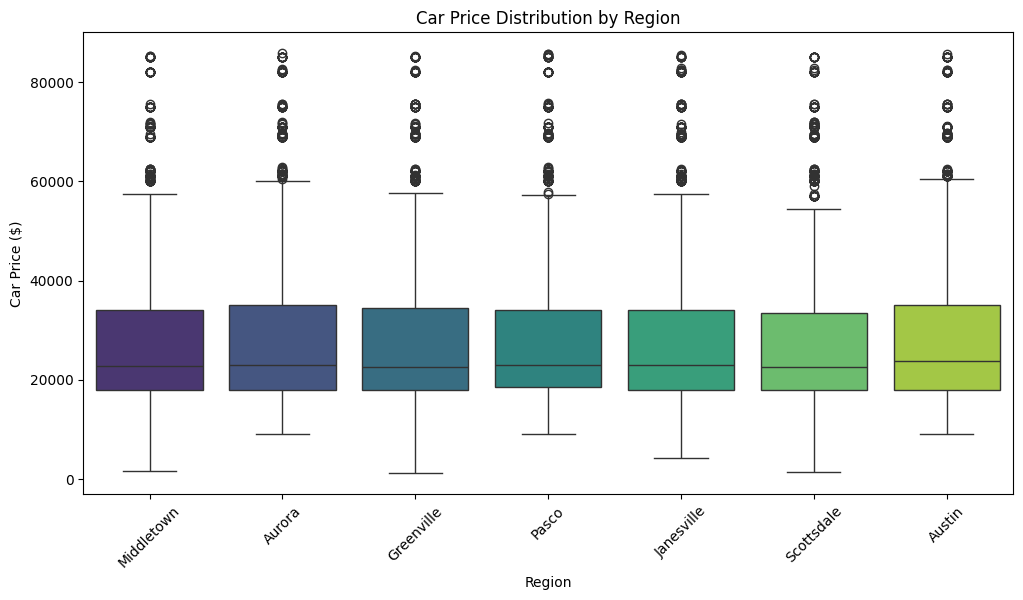

In [24]:
#What is the distribution of car prices by region, and how does the number of cars sold vary by region

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Car Sale.csv")

# Count number of cars sold by region
car_counts = df["Dealer_Region"].value_counts()

# Plot bar chart for number of cars sold by region
plt.figure(figsize=(12, 6))
sns.barplot(x=car_counts.index, y=car_counts.values, palette="coolwarm")
plt.xlabel("Region")
plt.ylabel("Number of Cars Sold")
plt.title("Number of Cars Sold by Region")
plt.xticks(rotation=45)
plt.show()

# Plot boxplot for price distribution by region
plt.figure(figsize=(12, 6))
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df, palette="viridis")
plt.xlabel("Region")
plt.ylabel("Car Price ($)")
plt.title("Car Price Distribution by Region")
plt.xticks(rotation=45)
plt.show()


In [25]:
#How does the average car price differ between cars with different engine sizes

# Check unique values in the Engine column
df["Engine"].value_counts().head(10)

# Calculate the average car price for each engine type
avg_price_by_engine = df.groupby("Engine")["Price ($)"].mean().reset_index()

# Rename columns for clarity
avg_price_by_engine.columns = ["Engine Type", "Average Price ($)"]
avg_price_by_engine



,Engine Type,Average Price ($)
0,DoubleÂ Overhead Camshaft,28248.525972
1,Overhead Camshaft,27914.710631


In [26]:
#How do car prices vary based on the customer’s annual income bracket
#print(df.columns)

# Define income brackets
bins = [0, 25000, 50000, 100000, 250000, 500000, 1000000, df["Annual Income"].max()]
labels = ["<25K", "25K-50K", "50K-100K", "100K-250K", "250K-500K", "500K-1M", "1M+"]

# Create a new column for income brackets
df["Income Bracket"] = pd.cut(df["Annual Income"], bins=bins, labels=labels, right=False)

# Calculate average car price for each income bracket
avg_price_by_income = df.groupby("Income Bracket")["Price ($)"].mean().reset_index()

# Rename columns for clarity
avg_price_by_income.columns = ["Income Bracket", "Average Price ($)"]
avg_price_by_income



/var/folders/jh/g_r1fv6517736v3zrlpkmgzw0000gn/T/ipykernel_4025/2821256569.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = df.groupby("Income Bracket")["Price ($)"].mean().reset_index()


,Income Bracket,Average Price ($)
0,<25K,27884.297820
1,25K-50K,NaN
2,50K-100K,43000.000000
3,100K-250K,29716.459459
4,250K-500K,28483.651332
5,500K-1M,27987.008477
6,1M+,28235.348958


In [27]:
# Find the top 5 car models with the highest number of sales
top_models = df["Model"].value_counts().head(5).index.tolist()

# Filter dataset for only these top models
top_models_df = df[df["Model"].isin(top_models)]

# Group by model and calculate price distribution statistics
price_distribution = top_models_df.groupby("Model")["Price ($)"].describe()

# Show results
price_distribution


,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
Diamante,418.0,22268.303828,9770.768958,12000.0,18000.0,19001.0,22000.0,49801.0
Passat,391.0,19600.728900,8218.521683,9000.0,12001.0,20000.0,27001.0,32501.0
Prizm,411.0,22838.457421,8012.531045,15000.0,16000.0,22000.0,25000.0,44700.0
Ram Pickup,383.0,27820.864230,13297.609534,16000.0,19000.0,21000.0,39300.0,57750.0
Silhouette,411.0,29858.513382,17940.571762,12000.0,14001.0,25000.0,34500.0,60750.0


In [37]:
#How does car price vary with engine size across different car colours, and which colours have the highest price variation
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate price variation (standard deviation) by color
price_variation_by_color = df.groupby("Color")["Price ($)"].std().reset_index()
price_variation_by_color = price_variation_by_color.sort_values(by="Price ($)", ascending=False)

# Display top 5 colors with highest price variation
top_colors = price_variation_by_color.head(5)
top_colors



,Color,Price ($)
2,Red,15519.360962
0,Black,15286.065976
1,Pale White,14077.346859


In [44]:
#Is there any seasonal trend in car sales based on the date of sale
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


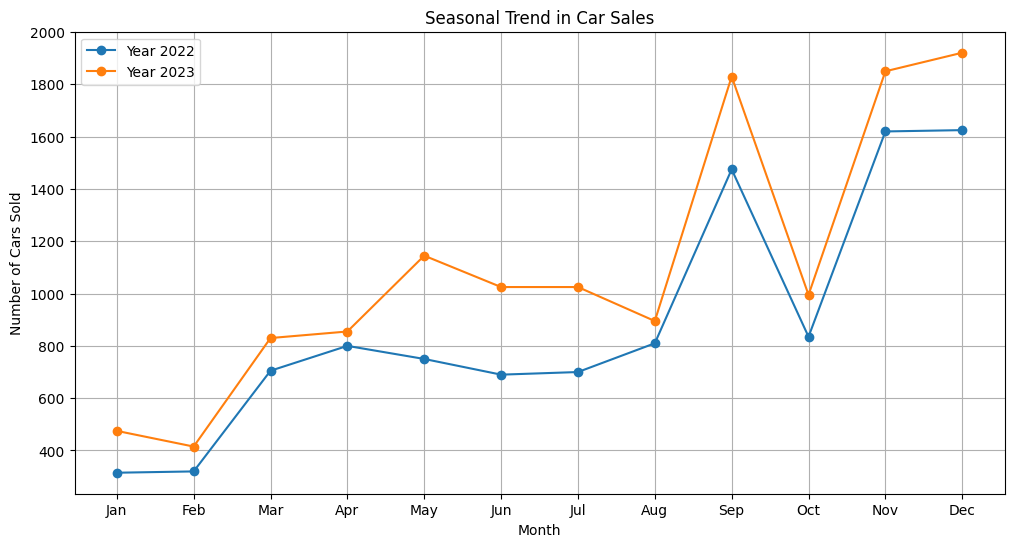

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Car Sale.csv")  # Update file path if needed

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Aggregate monthly sales
monthly_sales = df.groupby(['Year', 'Month']).size().reset_index(name='Sales')

# Plot seasonal sales trend
plt.figure(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
    subset = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(subset['Month'], subset['Sales'], marker='o', label=f'Year {year}')

plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.title("Seasonal Trend in Car Sales")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid()
plt.show()


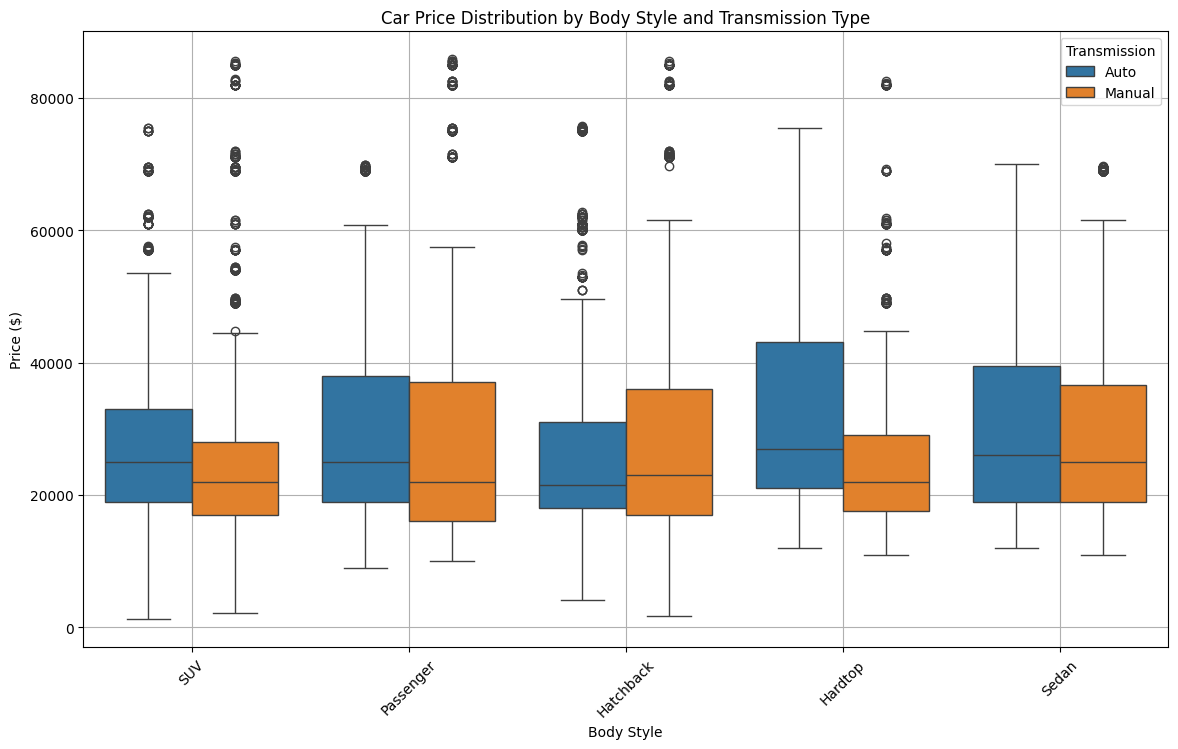

In [52]:
#How does the car price distribution change when considering different combinations of body style and transmission type
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Car Sale.csv")  # Adjust path if necessary

# Check for any null values in 'Price ($)', 'Body Style', and 'Transmission'
df = df.dropna(subset=['Price ($)', 'Body Style', 'Transmission'])

# Create a box plot to visualize price distribution by Body Style and Transmission
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')

plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Transmission')
plt.show()


#Expected Insights:
#Box Plots will show you the price spread (min, max, and quartiles) for each combination of Body Style and Transmission.
#The median line inside each box represents the typical car price for that combination.
#Outliers (extremely high or low prices) will be visible as dots outside the box.

/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


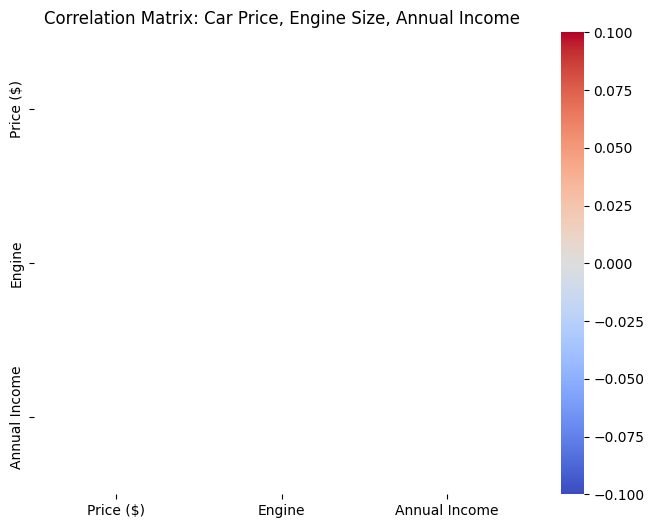

In [54]:
#What is the correlation between car price, engine size, and annual income of customers, and how do these features interact
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Adjust path if needed

# Convert Engine size to numeric if necessary
df['Engine'] = df['Engine'].astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)

# Select relevant columns
df_selected = df[['Price ($)', 'Engine', 'Annual Income']].dropna()

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Car Price, Engine Size, Annual Income")
plt.show()



/var/folders/jh/g_r1fv6517736v3zrlpkmgzw0000gn/T/ipykernel_4025/3879095218.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_selected, x='Engine', y='Price ($)', hue='Annual Income', palette='coolwarm')


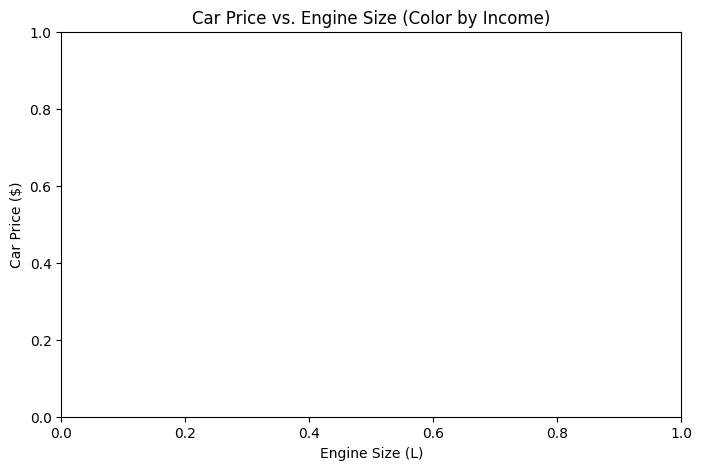

In [55]:
# Scatter plot: Engine Size vs. Car Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_selected, x='Engine', y='Price ($)', hue='Annual Income', palette='coolwarm')
plt.title("Car Price vs. Engine Size (Color by Income)")
plt.xlabel("Engine Size (L)")
plt.ylabel("Car Price ($)")
plt.show()


Expected Insights
Correlation Coefficients

If Engine Size and Price ($) show a strong positive correlation (~0.7 or higher) → Larger engines lead to higher car prices.
If Annual Income and Price ($) show a positive correlation → Higher income leads to buying more expensive cars.
Scatter Plot Observations

If there's a clear upward trend in the scatter plot → Cars with larger engines tend to be more expensive.
Color variation in the scatter plot → Wealthier customers might prefer cars with larger engines.

/var/folders/jh/g_r1fv6517736v3zrlpkmgzw0000gn/T/ipykernel_4025/1260095694.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Engine Size (L)")


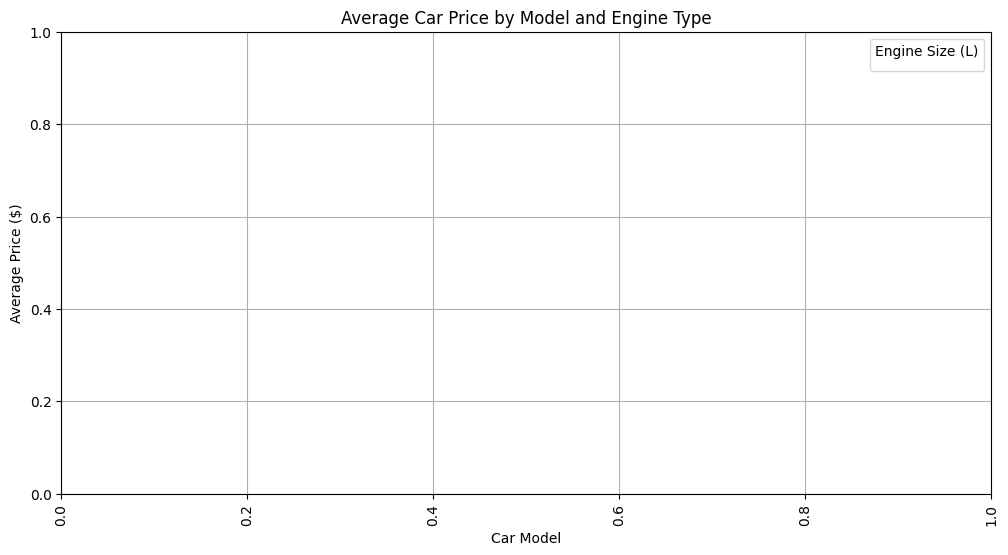

In [56]:
#How does the average car price vary across different car models and engine types?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Adjust path if necessary

# Convert Engine size to numeric if necessary
df['Engine'] = df['Engine'].astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)

# Group by Car Model and Engine Size, then calculate average price
avg_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Sort data by average price for better visualization
avg_price = avg_price.sort_values(by="Price ($)", ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price, x="Model", y="Price ($)", hue="Engine", palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Average Car Price by Model and Engine Type")
plt.xlabel("Car Model")
plt.ylabel("Average Price ($)")
plt.legend(title="Engine Size (L)")
plt.grid()
plt.show()
